# A. DATA IMPORT & EXPORT

DATA AT A FIRST GLANCE
There are 4 files provided by NHS and we import all of them and check the basic information together. 
3 of the files were considered obtained from NHS internal system 
but the source of the tweets file should be considered external data source which should be used with care.


In [1]:
# There are 4 files provided by NHS and we import all of them
# and check the basic information together

import pandas as pd

# import the files obtained from NHS
nc = pd.read_excel("national_categories.xlsx")
ar = pd.read_csv("appointments_regional.csv")
ad = pd.read_csv("actual_duration.csv")
tweets = pd.read_csv("tweets.csv")

In [2]:
# Check the nc dataframe structure and data types
print("There are [{0},{1},{2}] in the nc, ar and ac dataframe respectively.\n".
      format(nc.shape, ar.shape,ad.shape))

# It is found that the column's names:
# 'icb_ons_code' and 'count_of_appointments'  
# are existing in common to all 3 dataframes
print("Data Types in nc dataframe:\n", nc.dtypes,"\n")
print("Data Types in ar dataframe:\n", ar.dtypes,"\n")
print("Data Types in ad dataframe:\n", ad.dtypes,"\n")

There are [(817394, 8),(596821, 7),(137793, 8)] in the nc, ar and ac dataframe respectively.

Data Types in nc dataframe:
 appointment_date         datetime64[ns]
icb_ons_code                     object
sub_icb_location_name            object
service_setting                  object
context_type                     object
national_category                object
count_of_appointments             int64
appointment_month                object
dtype: object 

Data Types in ar dataframe:
 icb_ons_code                         object
appointment_month                    object
appointment_status                   object
hcp_type                             object
appointment_mode                     object
time_between_book_and_appointment    object
count_of_appointments                 int64
dtype: object 

Data Types in ad dataframe:
 sub_icb_location_code        object
sub_icb_location_ons_code    object
sub_icb_location_name        object
icb_ons_code                 object
region_ons_code

In [3]:
# Check the dataframe if there is any NA value
print("null value in nc dataframe:\n",nc.isna().sum(),"\n")
print("null value in ar dataframe:\n",ar.isna().sum(),"\n")
print("null value in ad dataframe:\n",ad.isna().sum(),"\n")

null value in nc dataframe:
 appointment_date         0
icb_ons_code             0
sub_icb_location_name    0
service_setting          0
context_type             0
national_category        0
count_of_appointments    0
appointment_month        0
dtype: int64 

null value in ar dataframe:
 icb_ons_code                         0
appointment_month                    0
appointment_status                   0
hcp_type                             0
appointment_mode                     0
time_between_book_and_appointment    0
count_of_appointments                0
dtype: int64 

null value in ad dataframe:
 sub_icb_location_code        0
sub_icb_location_ons_code    0
sub_icb_location_name        0
icb_ons_code                 0
region_ons_code              0
appointment_date             0
actual_duration              0
count_of_appointments        0
dtype: int64 



In [4]:
# Determine the descriptive statistics (e.g. df.describe()) and metadata (e.g. df.info()) of each DataFrame.
print("Statistics of nc:\n", nc.describe().round(decimals = 0))
print("Statistics of ar:\n", ar.describe().round(decimals = 0))
print("Statistics of ad:\n", ad.describe().round(decimals = 0))

Statistics of nc:
        count_of_appointments
count               817394.0
mean                   362.0
std                   1085.0
min                      1.0
25%                      7.0
50%                     25.0
75%                    128.0
max                  16590.0
Statistics of ar:
        count_of_appointments
count               596821.0
mean                  1245.0
std                   5857.0
min                      1.0
25%                      7.0
50%                     47.0
75%                    308.0
max                 211265.0
Statistics of ad:
        count_of_appointments
count               137793.0
mean                  1219.0
std                   1547.0
min                      1.0
25%                    194.0
50%                    696.0
75%                   1621.0
max                  15400.0


In [5]:
# Since the appointment date is shown as an 'object' dtype,
# it is better to parse it into a datetime format for further analysis by pandas to_datetime function

nc["appointment_date"] = pd.to_datetime(nc["appointment_date"])
ad["appointment_date"] = pd.to_datetime(ad["appointment_date"])

In [6]:
# Due to an issue with the data collection, DNA appointments were not captured correctly 
# after June 2018 and are under-reported until and including November 2018 for all 
# practices using the TPP SystmOne system.
# Therefore we are going to verify this statement would contribute to problem or not.

# Since the appointment_month column was a string dtype, first parse it into datetime format
from datetime import datetime
ar["appointment_month"]=pd.to_datetime(ar["appointment_month"])

# Display with YYYY-MM format by 
ar["appointment_month"] = ar["appointment_month"].dt.strftime('%Y-%m')

# Then Check the first and last appointment month in the dataframe
print("The first appointment month started from {0} to {1} in the ar dataframe."
      .format(ar["appointment_month"].min(),
              ar["appointment_month"].max()))

The first appointment month started from 2020-01 to 2022-06 in the ar dataframe.


In [7]:
# Check the first and last appointment date in the dataframe
print("The nc dataframe's earliest record started from {0} to {1}."
      .format(nc["appointment_date"].min(),
              nc["appointment_date"].max()))

print("The ad dataframe's earliest record started from {0} to {1}"
      .format(ad["appointment_date"].min(),
              ad["appointment_date"].max()))

The nc dataframe's earliest record started from 2021-08-01 00:00:00 to 2022-06-30 00:00:00.
The ad dataframe's earliest record started from 2021-12-01 00:00:00 to 2022-06-30 00:00:00


In [8]:
# Reflect: In nc dataframe, the items in the sub_icb_location_names column
# could be removed for improved readibility of the data
# We would adopt the regular expression method for this purpose

import re

df = nc["sub_icb_location_name"].replace('(NHS)|(ICB\s)', value ='', regex = True)
nc["sub_icb_location_name"] = df
nc.head()

,appointment_date,icb_ons_code,sub_icb_location_name,service_setting,context_type,national_category,count_of_appointments,appointment_month
0,2021-08-02,E54000050,North East and North Cumbria - 00L,Primary Care Network,Care Related Encounter,Patient contact during Care Home Round,3,2021-08
1,2021-08-02,E54000050,North East and North Cumbria - 00L,Other,Care Related Encounter,Planned Clinics,7,2021-08
2,2021-08-02,E54000050,North East and North Cumbria - 00L,General Practice,Care Related Encounter,Home Visit,79,2021-08
3,2021-08-02,E54000050,North East and North Cumbria - 00L,General Practice,Care Related Encounter,General Consultation Acute,725,2021-08
4,2021-08-02,E54000050,North East and North Cumbria - 00L,General Practice,Care Related Encounter,Structured Medication Review,2,2021-08


Dataframe Summary:
1. The 3 dataframes' earliest entries were all different to each other.
2. The earliest record of information appeared in the regional appointment dataset.
3. The 3 dataframes had the same record of timeline for the appointment records.
 

# BUSINESS QUESTIONS

In [9]:
# How many locations are there in the data set?
print("There are", len(nc["icb_ons_code"].unique()),"locations in the data set.\n")

# What are the five locations with the highest number of records?
print("The 5 location with highest number of recors:\n",
      nc.groupby("icb_ons_code")["count_of_appointments"]
      .sum()
      .sort_values(ascending=False)
      .head(5)
     )

There are 42 locations in the data set.

The 5 location with highest number of recors:
 icb_ons_code
E54000050    16882235
E54000054    14358371
E54000057    13857900
E54000008    13250311
E54000027    12142390
Name: count_of_appointments, dtype: int64


In [10]:
# How many service settings, context types, national categories, and appointment statuses are there?

print("There are\n {0} service settings\n {1} context types\n {2} national categories\n {3} appointment status respectively."
      .format(len(nc['service_setting'].unique()),len(nc['context_type'].unique()),len(nc['national_category'].unique()),len(ar["appointment_status"].unique())))


There are
 5 service settings
 3 context types
 18 national categories
 3 appointment status respectively.


# 2.0 DATA WRANGLING FOR THE 3 DATA FILES
1. The locations of the NHS service centers should be defined as a collection of sercive providers intended for offering a wide range of services to the community. As a result, the performance indicator like count of appointment and operating parameter like utility level should be derived individually for each locational characteristics.
2. The appointment status was a very important performance indicator according to the view of NHS management. From the ar file, we should focus on the relationship between the workload, professional types, and appointment status together

# A. Data Cleaning of ar and ad data file

In [11]:
# From the metadata, there should be two dataset that had missing information
# The first one was the actual_duration column in the ad data file
# and the second was the appointment_status in the ar data file
# check with the values contained there

print("appointment_status:", ar["appointment_status"].unique())
print("actual_duration:", ad["actual_duration"].unique())

appointment_status: ['Attended' 'DNA' 'Unknown']
actual_duration: ['31-60 Minutes' '21-30 Minutes' '6-10 Minutes' 'Unknown / Data Quality'
 '16-20 Minutes' '11-15 Minutes' '1-5 Minutes']


In [12]:
# ad file - Extract the actual duration with unknown / data quality issue
ad_subset = ad[ad["actual_duration"]!="Unknown / Data Quality"]

print(ad_subset.shape)
print(ad_subset.dtypes)
ad_subset.head()

(117632, 8)
sub_icb_location_code                object
sub_icb_location_ons_code            object
sub_icb_location_name                object
icb_ons_code                         object
region_ons_code                      object
appointment_date             datetime64[ns]
actual_duration                      object
count_of_appointments                 int64
dtype: object


,sub_icb_location_code,sub_icb_location_ons_code,sub_icb_location_name,icb_ons_code,region_ons_code,appointment_date,actual_duration,count_of_appointments
0,00L,E38000130,NHS North East and North Cumbria ICB - 00L,E54000050,E40000012,2021-12-01,31-60 Minutes,364
1,00L,E38000130,NHS North East and North Cumbria ICB - 00L,E54000050,E40000012,2021-12-01,21-30 Minutes,619
2,00L,E38000130,NHS North East and North Cumbria ICB - 00L,E54000050,E40000012,2021-12-01,6-10 Minutes,1698
4,00L,E38000130,NHS North East and North Cumbria ICB - 00L,E54000050,E40000012,2021-12-01,16-20 Minutes,730
5,00L,E38000130,NHS North East and North Cumbria ICB - 00L,E54000050,E40000012,2021-12-01,11-15 Minutes,1073


In [13]:
# View nc dataframe

print(nc.shape)
print(nc.dtypes)
print(nc.columns)
print(nc.head())

# Check NA
nc.isna().sum()


(817394, 8)
appointment_date         datetime64[ns]
icb_ons_code                     object
sub_icb_location_name            object
service_setting                  object
context_type                     object
national_category                object
count_of_appointments             int64
appointment_month                object
dtype: object
Index(['appointment_date', 'icb_ons_code', 'sub_icb_location_name',
       'service_setting', 'context_type', 'national_category',
       'count_of_appointments', 'appointment_month'],
      dtype='object')
  appointment_date icb_ons_code                sub_icb_location_name  \
0       2021-08-02    E54000050   North East and North Cumbria - 00L   
1       2021-08-02    E54000050   North East and North Cumbria - 00L   
2       2021-08-02    E54000050   North East and North Cumbria - 00L   
3       2021-08-02    E54000050   North East and North Cumbria - 00L   
4       2021-08-02    E54000050   North East and North Cumbria - 00L   

        servic

appointment_date         0
icb_ons_code             0
sub_icb_location_name    0
service_setting          0
context_type             0
national_category        0
count_of_appointments    0
appointment_month        0
dtype: int64

In [14]:
# ar file - Extract the duration with unknown appointment status
missing_appointment_status = ar[ar["appointment_status"]=='Unknown']

print(missing_appointment_status.shape)
print(missing_appointment_status.dtypes)
missing_appointment_status.head()

(201324, 7)
icb_ons_code                         object
appointment_month                    object
appointment_status                   object
hcp_type                             object
appointment_mode                     object
time_between_book_and_appointment    object
count_of_appointments                 int64
dtype: object


,icb_ons_code,appointment_month,appointment_status,hcp_type,appointment_mode,time_between_book_and_appointment,count_of_appointments
124,E54000034,2020-01,Unknown,GP,Face-to-Face,1 Day,264
125,E54000034,2020-01,Unknown,GP,Face-to-Face,15 to 21 Days,706
126,E54000034,2020-01,Unknown,GP,Face-to-Face,2 to 7 Days,682
127,E54000034,2020-01,Unknown,GP,Face-to-Face,22 to 28 Days,702
128,E54000034,2020-01,Unknown,GP,Face-to-Face,8 to 14 Days,682


In [15]:
# Remove rows with Unknown data
ar_subset = ar[ar["appointment_status"]!='Unknown']

print(ar_subset.shape)
print(ar_subset.dtypes)
ar_subset.head()

(395497, 7)
icb_ons_code                         object
appointment_month                    object
appointment_status                   object
hcp_type                             object
appointment_mode                     object
time_between_book_and_appointment    object
count_of_appointments                 int64
dtype: object


,icb_ons_code,appointment_month,appointment_status,hcp_type,appointment_mode,time_between_book_and_appointment,count_of_appointments
0,E54000034,2020-01,Attended,GP,Face-to-Face,1 Day,8107
1,E54000034,2020-01,Attended,GP,Face-to-Face,15 to 21 Days,6791
2,E54000034,2020-01,Attended,GP,Face-to-Face,2 to 7 Days,20686
3,E54000034,2020-01,Attended,GP,Face-to-Face,22 to 28 Days,4268
4,E54000034,2020-01,Attended,GP,Face-to-Face,8 to 14 Days,11971


# DATA TYPES CHECK
In the ad file, the actual duration was categoried into several group. In fact, they could be of help to estimate the time spent with each appointment visit. We could use the group tag, e.g. 31-60 minutes, to give an estimate of 45 minutes actual parameter for that particular appointment.

As such, by multiplying the daily count of appointments, we are able to give an average manhour on that day


In [16]:

ad_subset["actual_duration"]= ad_subset["actual_duration"].replace("\sMinutes","",regex=True)
ad_subset

C:\Users\Kenneth Lo\AppData\Local\Temp\ipykernel_14552\2378387847.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ad_subset["actual_duration"]= ad_subset["actual_duration"].replace("\sMinutes","",regex=True)


,sub_icb_location_code,sub_icb_location_ons_code,sub_icb_location_name,icb_ons_code,region_ons_code,appointment_date,actual_duration,count_of_appointments
0,00L,E38000130,NHS North East and North Cumbria ICB - 00L,E54000050,E40000012,2021-12-01,31-60,364
1,00L,E38000130,NHS North East and North Cumbria ICB - 00L,E54000050,E40000012,2021-12-01,21-30,619
2,00L,E38000130,NHS North East and North Cumbria ICB - 00L,E54000050,E40000012,2021-12-01,6-10,1698
4,00L,E38000130,NHS North East and North Cumbria ICB - 00L,E54000050,E40000012,2021-12-01,16-20,730
5,00L,E38000130,NHS North East and North Cumbria ICB - 00L,E54000050,E40000012,2021-12-01,11-15,1073
...,...,...,...,...,...,...,...,...
137788,X2C4Y,E38000254,NHS West Yorkshire ICB - X2C4Y,E54000054,E40000012,2022-06-30,31-60,430
137789,X2C4Y,E38000254,NHS West Yorkshire ICB - X2C4Y,E54000054,E40000012,2022-06-30,21-30,751
137790,X2C4Y,E38000254,NHS West Yorkshire ICB - X2C4Y,E54000054,E40000012,2022-06-30,16-20,921
137791,X2C4Y,E38000254,NHS West Yorkshire ICB - X2C4Y,E54000054,E40000012,2022-06-30,11-15,1439


In [17]:
# Change the data type from String to float for the actual_duration column
ad_subset["actual_duration"]= ad_subset["actual_duration"].replace("\sMinutes","",regex=True)

# Calculate the actual duration with a median minute-time of each group in it
start=[]
end =[]
for i in ad_subset["actual_duration"]:
    i = i.split("-")
    start += [i[0]]
    end += [i[1]]

# specify new columns as start and end
ad_subset["appointment_start"] = start
ad_subset["appointment_end"] = end

# Change the type of the data from string to float
ad_subset["appointment_start"]= ad_subset["appointment_start"].astype('float')
ad_subset["appointment_end"] = ad_subset["appointment_end"].astype('float')

# Add a new column of tags for the actual duration
ad_subset["tag_actual_duration"]= ad_subset["appointment_start"]+(ad_subset["appointment_end"]-ad_subset["appointment_start"])/2

C:\Users\Kenneth Lo\AppData\Local\Temp\ipykernel_14552\280317071.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ad_subset["actual_duration"]= ad_subset["actual_duration"].replace("\sMinutes","",regex=True)
C:\Users\Kenneth Lo\AppData\Local\Temp\ipykernel_14552\280317071.py:13: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ad_subset["appointment_start"] = start
C:\Users\Kenneth Lo\AppData\Local\Temp\ipykernel_14552\280317071.py:14: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slic

In [18]:
# Now we can calculate the total estimate of resource for spent on appointment 
# for each center on each date
ad_subset["total_hours"] = ad_subset["tag_actual_duration"] * ad_subset["count_of_appointments"]/60
ad_subset["total_hours"]= ad_subset["total_hours"].astype('int') # Change from float to integer for better readibility
# shortening the sub-icb location name for better readibility

import re
ad_subset['sub_icb_location_name'] = ad_subset['sub_icb_location_name'].str.replace('(NHS)|(ICB\s)', "", regex=True)
ad_subset.head()

C:\Users\Kenneth Lo\AppData\Local\Temp\ipykernel_14552\1542060844.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ad_subset["total_hours"] = ad_subset["tag_actual_duration"] * ad_subset["count_of_appointments"]/60
C:\Users\Kenneth Lo\AppData\Local\Temp\ipykernel_14552\1542060844.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ad_subset["total_hours"]= ad_subset["total_hours"].astype('int') # Change from float to integer for better readibility
C:\Users\Kenneth Lo\AppData\Local\Temp\ipykernel_14552\15

,sub_icb_location_code,sub_icb_location_ons_code,sub_icb_location_name,icb_ons_code,region_ons_code,appointment_date,actual_duration,count_of_appointments,appointment_start,appointment_end,tag_actual_duration,total_hours
0,00L,E38000130,North East and North Cumbria - 00L,E54000050,E40000012,2021-12-01,31-60,364,31.0,60.0,45.5,276
1,00L,E38000130,North East and North Cumbria - 00L,E54000050,E40000012,2021-12-01,21-30,619,21.0,30.0,25.5,263
2,00L,E38000130,North East and North Cumbria - 00L,E54000050,E40000012,2021-12-01,6-10,1698,6.0,10.0,8.0,226
4,00L,E38000130,North East and North Cumbria - 00L,E54000050,E40000012,2021-12-01,16-20,730,16.0,20.0,18.0,219
5,00L,E38000130,North East and North Cumbria - 00L,E54000050,E40000012,2021-12-01,11-15,1073,11.0,15.0,13.0,232


# BUSINESS STACKHOLDERS' QUESTIONS:
1. Create three visualisations indicating the number of appointments per month for service settings, context types, and national categories.
2. Create four visualisations indicating the number of appointments for service setting per season. The seasons are summer (August 2021), autumn (October 2021), winter (January 2022), and spring (April 2022).

In [19]:
# Create subsets of the nc dataframe for analysis of question 1

import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

nc["appointment_month"] = nc["appointment_month"].astype(str)
nc_ss = nc.groupby (["appointment_month", "service_setting"]
                   )["count_of_appointments"
                    ].sum().reset_index()

nc_ct = nc.groupby (["appointment_month", "context_type"]
                   )["count_of_appointments"
                    ].sum().reset_index()

nc_nc = nc.groupby (["appointment_month", "national_category"]
                   )["count_of_appointments"
                    ].sum().reset_index()



C:\Users\Kenneth Lo\AppData\Local\Temp\ipykernel_14552\3926744362.py:31: FutureWarning: The default value of numeric_only in DataFrameGroupBy.mean is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  print(nc_ss.groupby("service_setting").mean().sort_values(by="count_of_appointments", ascending=False))


                           count_of_appointments
service_setting                                 
General Practice                    2.461924e+07
Unmapped                            1.007346e+06
Primary Care Network                5.961260e+05
Other                               4.927342e+05
Extended Access Provision           1.978915e+05

The percentage of General Practice service comprised 91.48% of all the services.


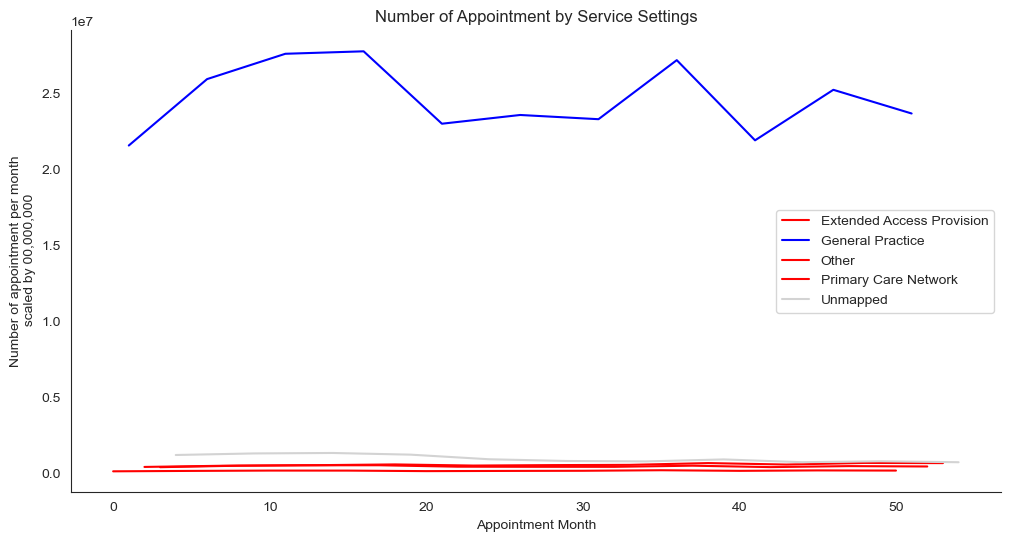

In [31]:
# Since Primary Care Network, Extended Access Provision, and Other
# Appointments delivered by staff employed or engaged with an external
# contractual arrangement, the fulfillment of services associated
# should be treated seperately

fig, ax = plt.subplots(figsize=(12,6))
                       
sns.set_style("white")
ax.set_title("Number of Appointment by Service Settings")
ax.set_xlabel("Appointment Month")
ax.set_ylabel("Number of appointment per month\n scaled by 00,000,000")

# Create a lineplot.
for service in nc_ss["service_setting"].unique():
    nc_for_service = nc_ss[nc_ss["service_setting"]== service]
    if service == "Primary Care Network" or service == "Extended Access Provision" or service=="Other":
        line_color = "r" 
    elif service == "General Practice":
        line_color = "b"
    else: line_color = "lightgrey"
        
    ax.plot(nc_for_service.index, nc_for_service["count_of_appointments"], color=line_color, label = service)

sns.despine()
plt.legend()

# Calculate the percentage of General Practice within the whole group
total_gp = nc_ss.groupby("service_setting")["count_of_appointments"].sum()
GP_percentage = total_gp.loc["General Practice"] / total_gp.sum()*100

print(nc_ss.groupby("service_setting").mean().sort_values(by="count_of_appointments", ascending=False))
print("\nThe percentage of General Practice service comprised {:.2f}% of all the services.".format(GP_percentage))
# It is clearly shown in the plot that the service setting were mainly contributed
# by practice staff activity under the GMS/PMS/APMS contract.
# This could be a direct for further study on the mix of different contracts arrangement
# to segregate the demand criteria 


C:\Users\Kenneth Lo\AppData\Local\Temp\ipykernel_14552\79162561.py:30: FutureWarning: The default value of numeric_only in DataFrameGroupBy.mean is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  print(nc_ct.groupby("context_type").mean().sort_values(by="count_of_appointments", ascending=False))


                        count_of_appointments
context_type                                 
Care Related Encounter           2.337047e+07
Inconsistent Mapping             2.535527e+06
Unmapped                         1.007346e+06

The percentage of Care Related Encounter comprised 86.84% of all the contexts.


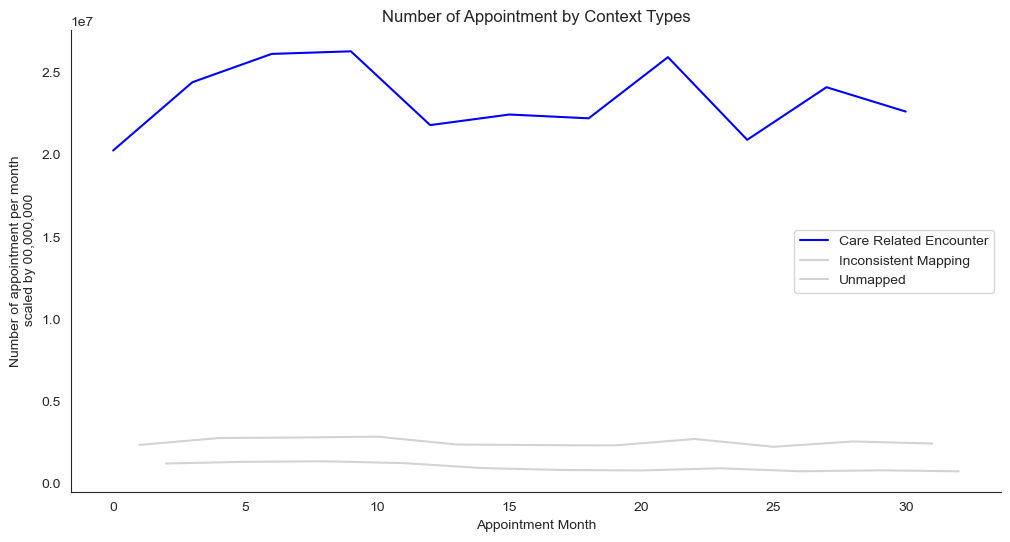

In [32]:
# Creation of line plot for the context type
#From the metadata, 'Inconsistent Mapping' were appointment types
# that have been mapped but not to a Care Related Encounter. 
# Appointments under this context type conflict with the description of an appointment. 
# Unmapped – No record of a category against an appointment slot type. 

fig, ax = plt.subplots(figsize=(12,6))
                       
sns.set_style("white")
ax.set_title("Number of Appointment by Context Types")
ax.set_xlabel("Appointment Month")
ax.set_ylabel("Number of appointment per month\n scaled by 00,000,000")

# Create a lineplot.
for context in nc_ct["context_type"].unique():
    nc_for_context = nc_ct[nc_ct["context_type"]==context]
    line_color = 'lightgrey' if context == "Inconsistent Mapping" or context == "Unmapped" else "b"
    
    ax.plot(nc_for_context.index, nc_for_context["count_of_appointments"],
            color=line_color,
            label=context)
    
sns.despine()
plt.legend()

# Calculate the percentage of General Practice within the whole group
total_cre = nc_ct.groupby("context_type")["count_of_appointments"].sum()
cre_percentage = total_cre.loc["Care Related Encounter"] / total_cre.sum()*100

print(nc_ct.groupby("context_type").mean().sort_values(by="count_of_appointments", ascending=False))
print("\nThe percentage of Care Related Encounter comprised {:.2f}% of all the contexts.".format(cre_percentage))

# From the plot it could be discovered that only the Care Related Encounter
# shown a random pattern over time and the other two contexts actually were
# considered a systematic error and stable in the study period

C:\Users\Kenneth Lo\AppData\Local\Temp\ipykernel_14552\285083220.py:44: FutureWarning: The default value of numeric_only in DataFrameGroupBy.mean is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  print(nc_nc.groupby("national_category").mean().sort_values(by="count_of_appointments", ascending=False).head(7))


                              count_of_appointments
national_category                                  
General Consultation Routine           8.842866e+06
General Consultation Acute             4.881014e+06
Clinical Triage                        3.776997e+06
Planned Clinics                        2.547250e+06
Inconsistent Mapping                   2.535527e+06
Planned Clinical Procedure             2.336609e+06
Unmapped                               1.007346e+06


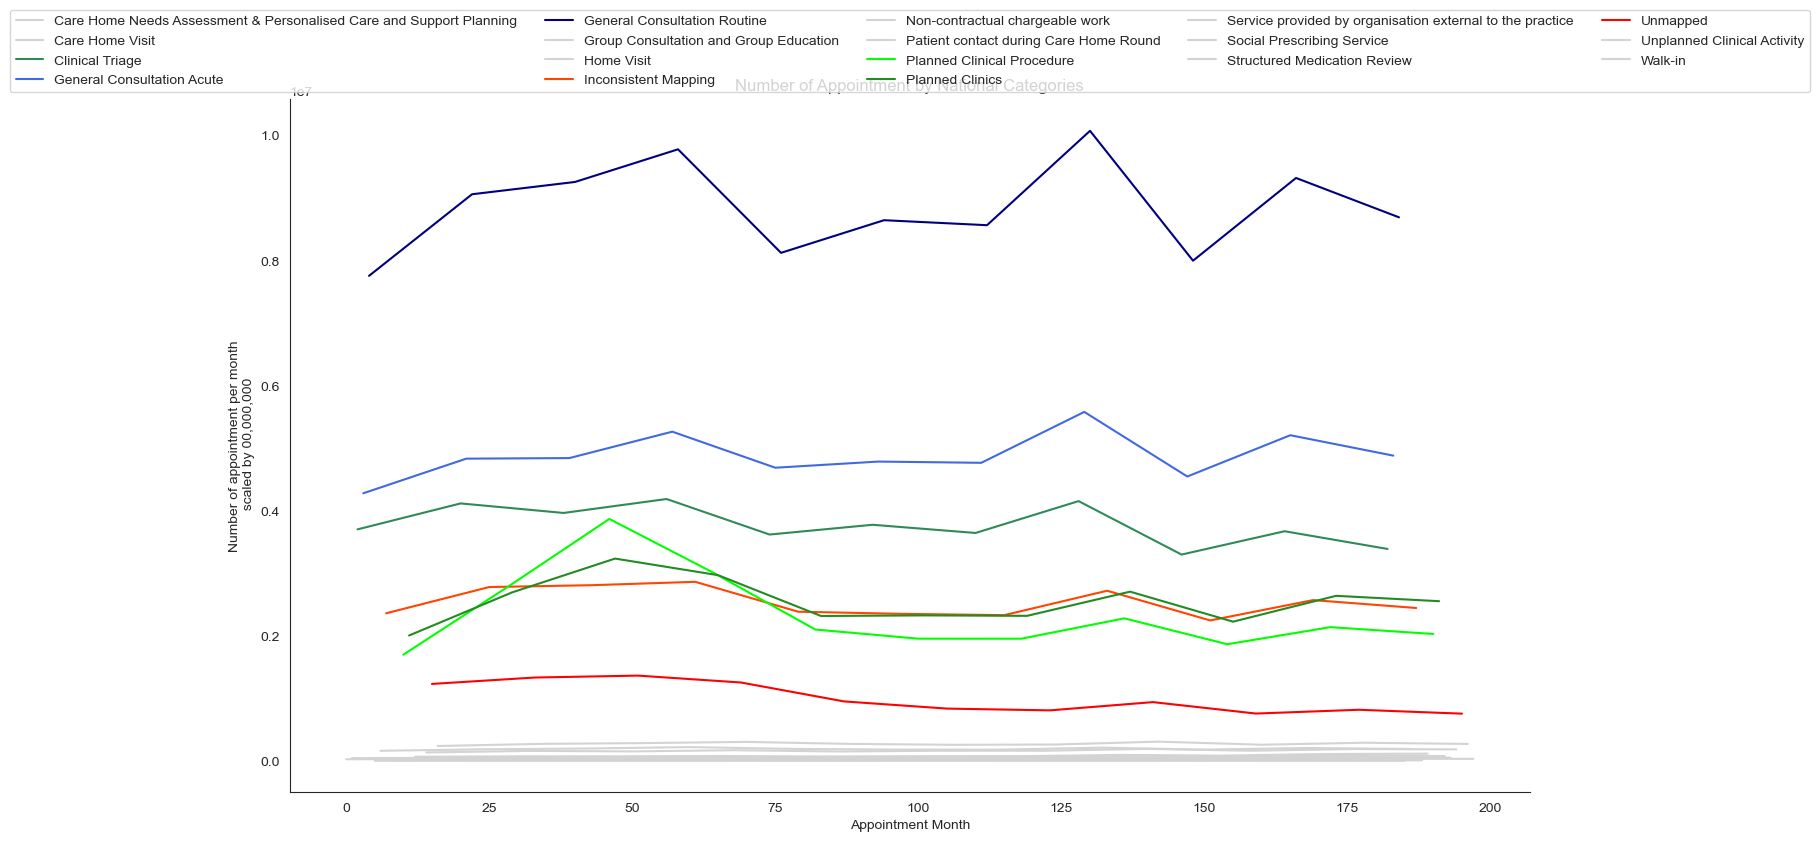

In [33]:
fig,ax= plt.subplots(figsize = (16,9))
sns.set_style("whitegrid")
ax.set_title("Number of Appointment by National Categories")
sns.color_palette('bright')
ax.set_xlabel("Appointment Month")
ax.set_ylabel("Number of appointment per month\n scaled by 00,000,000")


for category in nc_nc["national_category"].unique():
    nc_cat = nc_nc[nc_nc["national_category"]==category]
    
    if category == "General Consultation Routine":
        line_color = "navy"
    
    elif category == "General Consultation Acute":
        line_color = "royalblue"
    
    elif category == "Clinical Triage":
        line_color = "seagreen"
        
    elif category == "Planned Clinics":
        line_color = "forestgreen"
        
    elif category == "Inconsistent Mapping":
        line_color = "orangered"
    
    elif category == "Unmapped":
        line_color = "red"
    
    elif category == "Planned Clinical Procedure":
        line_color = "lime"
          
    else:
        line_color = "lightgrey"
    
    ax.plot(nc_cat.index, nc_cat["count_of_appointments"],
            color=line_color,
            label=category)

plt.legend(loc="lower center",bbox_to_anchor=(.5, 1), ncol=5)

sns.despine()

print(nc_nc.groupby("national_category").mean().sort_values(by="count_of_appointments", ascending=False).head(7))

# In the line plot, we could classify into 3 important groups as follow:
# Blue zone: General Consultation Routine , General Consultation Acute
# Green zone: Clinical Triage, Planned Clinics, Planned Clinical Procedure
# Red zone : Unmapped and Inconsistent Mapping
# Grey Zone: Number of appointment of each category might be neglible


# INSIGHTS FROM THE VISUALIZATION
1.	The overall trend for the service_setting and context types were moving with very close and similar pattern which were likely that the input meta data were realized as the same from the practitioners.
2.	For the national category, we could identify three major zone by observation: 
-	the Red Zone,
the "inconsistent mapping" was moving with different pattern
-	the Green Zone(clinical triage, planned clinical procedure & planned clinics)
"Planned Clinical Procedure" appeared some abnormal pattern in the period from 2021-8 to 2021-12 thus advised to investigate the roots
-	the Blue Zone
3.	FORECASTING MODEL COULD BE SUGGESTED based on NATIONAL_CATEGORIES AS CONTRIBUTING FACTORS for resource allocations.



In [21]:
# Construct the subset dataframe of nc into spring, summer, autumn and winter
nc["appointment_month"] = nc["appointment_month"].astype(str)
nc_ss_day = nc.groupby(["appointment_date","appointment_month","service_setting"])["count_of_appointments"].sum()  
nc_ss_day = nc_ss_day.reset_index()
nc_ss_day["appointment_month"] = nc_ss_day["appointment_month"].astype('str')

summer = nc_ss_day[nc_ss_day["appointment_month"]=='2021-08']
autumn  = nc_ss_day[nc_ss_day["appointment_month"]=='2021-10']
winter = nc_ss_day[nc_ss_day["appointment_month"]=='2022-01']
spring = nc_ss_day[nc_ss_day["appointment_month"]=='2022-04']

summer["season"] = 'summer'
autumn["season"] = 'autumn'
winter["season"] = 'winter'
spring["season"] = 'spring'


C:\Users\Kenneth Lo\AppData\Local\Temp\ipykernel_14552\670703318.py:12: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  summer["season"] = 'summer'
C:\Users\Kenneth Lo\AppData\Local\Temp\ipykernel_14552\670703318.py:13: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  autumn["season"] = 'autumn'
C:\Users\Kenneth Lo\AppData\Local\Temp\ipykernel_14552\670703318.py:14: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead


<Axes: xlabel='appointment_date', ylabel='count_of_appointments'>

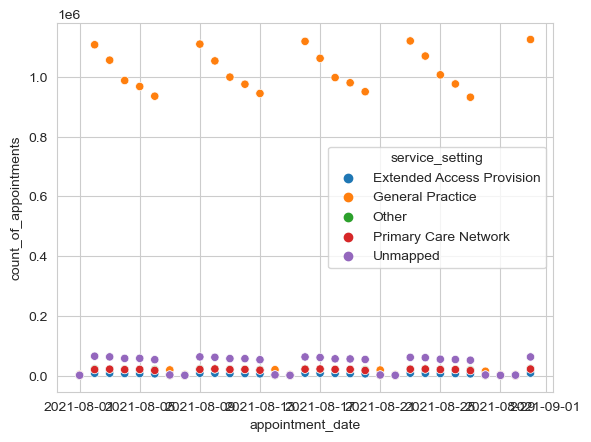

In [22]:
# Explore if any pattern with 1 plot, scatterplot would be chosen in order that
# the daily variation by category could be easier to be identified.

sns.scatterplot(summer, x="appointment_date", y="count_of_appointments", hue="service_setting")

# From the plot below, it is clearly showing a recurring pattern in four times approximately
# This might be due to the patients' behavior about their week=agenda
# Thus we would break down the dataframe by day of week to investigate further

In [23]:
# We would create a new column "weekday" as a new category
# and from the datetime library we would use the day_of_week method
# where Monday=0, Sunday=6

summer['weekday'] = summer["appointment_date"].dt.day_of_week
autumn['weekday'] = autumn["appointment_date"].dt.day_of_week
winter['weekday'] = winter["appointment_date"].dt.day_of_week
spring['weekday'] = spring["appointment_date"].dt.day_of_week


C:\Users\Kenneth Lo\AppData\Local\Temp\ipykernel_14552\573493212.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  summer['weekday'] = summer["appointment_date"].dt.day_of_week
C:\Users\Kenneth Lo\AppData\Local\Temp\ipykernel_14552\573493212.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  autumn['weekday'] = autumn["appointment_date"].dt.day_of_week
C:\Users\Kenneth Lo\AppData\Local\Temp\ipykernel_14552\573493212.py:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a Da

In [24]:
season = pd.concat([summer,autumn,winter,spring], ignore_index=True)

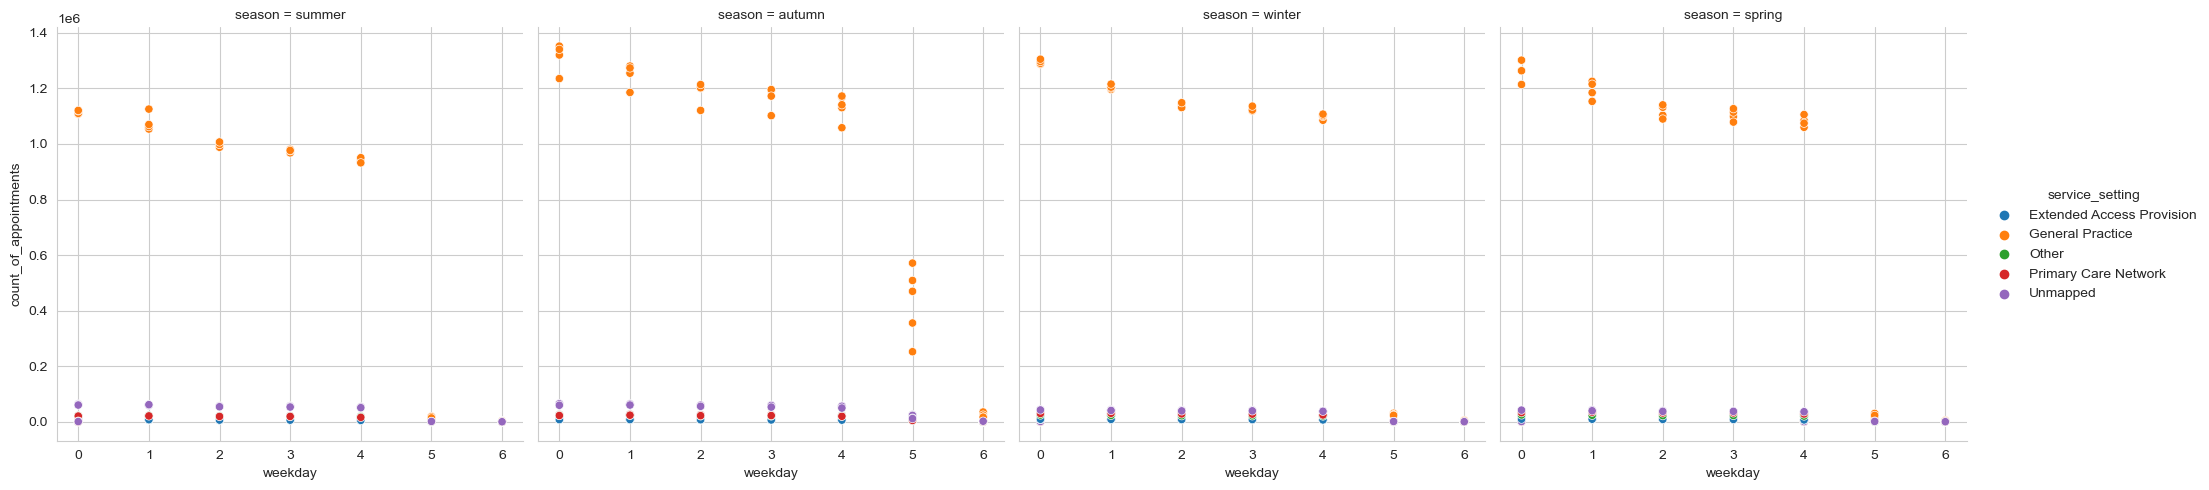

In [25]:
sns.relplot(season, x="weekday", y="count_of_appointments", hue = "service_setting", col ="season")

# INSIGHT FROM THE SEASONAL PLOT
1. Patitents were generally not likely for appointment on Sat and Sun, but most likely on Mon, except the Sat in AUTUMN
2. Appointments would be less during the SUMMER time in general on average

In [34]:
ad_subset.head()

,sub_icb_location_code,sub_icb_location_ons_code,sub_icb_location_name,icb_ons_code,region_ons_code,appointment_date,actual_duration,count_of_appointments,appointment_start,appointment_end,tag_actual_duration,total_hours
0,00L,E38000130,North East and North Cumbria - 00L,E54000050,E40000012,2021-12-01,31-60,364,31.0,60.0,45.5,276
1,00L,E38000130,North East and North Cumbria - 00L,E54000050,E40000012,2021-12-01,21-30,619,21.0,30.0,25.5,263
2,00L,E38000130,North East and North Cumbria - 00L,E54000050,E40000012,2021-12-01,6-10,1698,6.0,10.0,8.0,226
4,00L,E38000130,North East and North Cumbria - 00L,E54000050,E40000012,2021-12-01,16-20,730,16.0,20.0,18.0,219
5,00L,E38000130,North East and North Cumbria - 00L,E54000050,E40000012,2021-12-01,11-15,1073,11.0,15.0,13.0,232


# ANALYZING EXTERNAL DATA SOURCE
Tweeter is a well-known social netowrk platform and millions of user expressing their thought and idea on every dimensions of life.
We are given the scraped data from the tweets data files and we are going to explore the message from the public community with a superficial approach. It is always to consider the related legislation for the purpose of using the data and how the privacy of users could be maximally secured.

In [75]:
tweets = pd.read_csv("tweets.csv")
pd.options.display.max_colwidth=200
print(tweets.shape)
print(tweets.dtypes)
tweets.head()

(1174, 10)
tweet_id                    int64
tweet_full_text            object
tweet_entities             object
tweet_entities_hashtags    object
tweet_metadata             object
tweet_retweet_count         int64
tweet_favorite_count        int64
tweet_favorited              bool
tweet_retweeted              bool
tweet_lang                 object
dtype: object


,tweet_id,tweet_full_text,tweet_entities,tweet_entities_hashtags,tweet_metadata,tweet_retweet_count,tweet_favorite_count,tweet_favorited,tweet_retweeted,tweet_lang
0,1567629223795527681,"As Arkansas’ first Comprehensive Stroke Certified Center, UAMS provides Arkansans with access to the most advanced stoke care. Join us in our mission to make a difference in the health and well-be...","{'hashtags': [{'text': 'Healthcare', 'indices': [253, 264]}], 'symbols': [], 'user_mentions': [], 'urls': [{'url': 'https://t.co/yw0cstfmSI', 'expanded_url': 'https://bit.ly/3BiSKbs', 'display_url...",#Healthcare,"{'iso_language_code': 'en', 'result_type': 'recent'}",0,0,False,False,en
1,1567582846612553728,RT @AndreaGrammer: Work-life balance is at the foundation of how decisions are made and where #PremiseHealth is headed. We're #hiring for…,"{'hashtags': [{'text': 'PremiseHealth', 'indices': [94, 108]}, {'text': 'hiring', 'indices': [127, 134]}], 'symbols': [], 'user_mentions': [{'screen_name': 'AndreaGrammer', 'name': 'Andrea Grammer...","#PremiseHealth, #hiring","{'iso_language_code': 'en', 'result_type': 'recent'}",2,0,False,False,en
2,1567582787070304256,RT @OntarioGreens: $10 billion can go a long way to fixing our broken #Healthcare system.\n\nYet Doug Ford would rather spend it ALL on a hig…,"{'hashtags': [{'text': 'Healthcare', 'indices': [70, 81]}], 'symbols': [], 'user_mentions': [{'screen_name': 'OntarioGreens', 'name': 'Green Party of Ontario', 'id': 37115912, 'id_str': '37115912'...",#Healthcare,"{'iso_language_code': 'en', 'result_type': 'recent'}",39,0,False,False,en
3,1567582767625428992,RT @modrnhealthcr: 🚨#NEW:🚨 Insurance companies are figuring out the best ways to collect information about members’ race and ethnicity data…,"{'hashtags': [{'text': 'NEW', 'indices': [20, 24]}], 'symbols': [], 'user_mentions': [{'screen_name': 'modrnhealthcr', 'name': 'Modern Healthcare', 'id': 18935711, 'id_str': '18935711', 'indices':...",#NEW,"{'iso_language_code': 'en', 'result_type': 'recent'}",5,0,False,False,en
4,1567582720460570625,"ICYMI: Our recent blogs on Cybersecurity in Accounting https://t.co/4nnK0FiVVL and Digital Transformation in Healthcare Finance https://t.co/jIqn52lHD3 are a great read, take a look!\n\n#blogs #di...","{'hashtags': [{'text': 'blogs', 'indices': [184, 190]}, {'text': 'digitaltransformation', 'indices': [191, 213]}, {'text': 'cybersecurity', 'indices': [214, 228]}, {'text': 'accounting', 'indices'...","#blogs, #digitaltransformation, #cybersecurity, #accounting, #finance, #healthcare","{'iso_language_code': 'en', 'result_type': 'recent'}",0,0,False,False,en


In [ ]:
tweets.isna().sum()

In [76]:
# Check NA's cells at a glance and it would be normal 
# if a user did not add a hastage in his post sometimes
tweetNA = tweets[tweets.isna().any(axis=1)]

In [77]:
# Explore the structure and statistics of Tweets dataframe
print(tweets.info())
tweets.describe().loc[["mean", "std"]]

 

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1174 entries, 0 to 1173
Data columns (total 10 columns):
 #   Column                   Non-Null Count  Dtype 
---  ------                   --------------  ----- 
 0   tweet_id                 1174 non-null   int64 
 1   tweet_full_text          1174 non-null   object
 2   tweet_entities           1174 non-null   object
 3   tweet_entities_hashtags  1007 non-null   object
 4   tweet_metadata           1174 non-null   object
 5   tweet_retweet_count      1174 non-null   int64 
 6   tweet_favorite_count     1174 non-null   int64 
 7   tweet_favorited          1174 non-null   bool  
 8   tweet_retweeted          1174 non-null   bool  
 9   tweet_lang               1174 non-null   object
dtypes: bool(2), int64(3), object(5)
memory usage: 75.8+ KB
None


,tweet_id,tweet_retweet_count,tweet_favorite_count
mean,1.567612e+18,8.629472,0.37138
std,2.427553e+13,29.784675,2.04470


In [79]:
# analyse tweets from Twitter to determine whether 
# there has been a high volume of hashtags related to healthcare in the UK
# A word count for "healthcare" in the given tweets file would be conducted
# by iterating the target words in the messages from users

tags={}
for text in tweets["tweet_full_text"]:
    try:
        for words in text.split(" "):
            if "#" in words:
                tag = words.lower() # Change to lower case()
                tags[tag] = tags.get(tag,0) +1
                                
    except:
        text=None


In [80]:
# Create a Pandas Series for visiualization
distrib = pd.Series(tags)
distrib.index.name = "Tags_from_Tweets"
distrib.name = "Count_of_Tag"
distrib.sort_values(ascending = False)

Tags_from_Tweets
#healthcare      716
#health           80
#medicine         41
#ai               40
#job              38
                ... 
#evestudy          1
#patientdata…      1
#secure            1
#sms               1
\n#csjmu           1
Name: Count_of_Tag, Length: 1754, dtype: int64

In [81]:
distrib = distrib.reset_index()
distribution = distrib[distrib["Count_of_Tag"]>=10].sort_values(by="Count_of_Tag", ascending=False)
distribution.head(10)

,Tags_from_Tweets,Count_of_Tag
0,#healthcare,716
124,#health,80
90,#medicine,41
201,#ai,40
29,#job,38
91,#medical,35
95,#strategy,30
104,#pharmaceutical,28
102,#pharma,25
100,#marketing,25


In [82]:
distribution = distrib[distrib["Count_of_Tag"]>=10].sort_values(by="Count_of_Tag", ascending=False)

<Axes: xlabel='Count_of_Tag', ylabel='Tags_from_Tweets'>

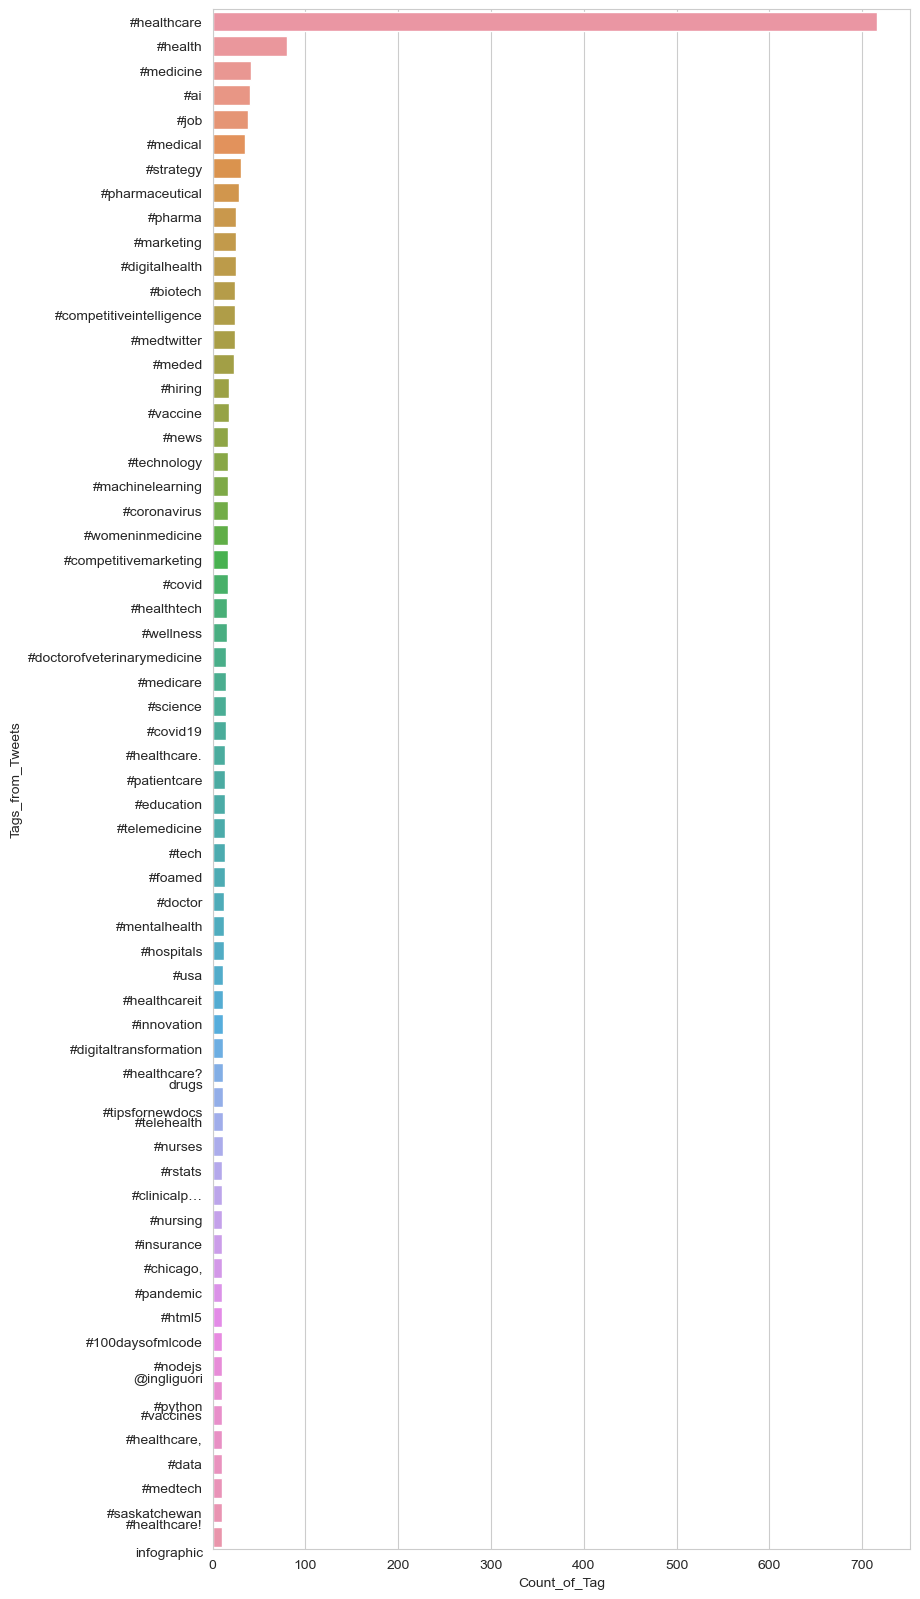

In [83]:
fig,ax = plt.subplots(figsize=(9,20))
sns.barplot(y="Tags_from_Tweets", x="Count_of_Tag", data=distribution)

# INSIGHTS FROM THE TWEETS

1. 716 counts from 1174 posts in Tweets demonstrated to be very heated topic of discussion.
2. The average tweet_retweet_count revealed a post would be retweeted 8.63 times on average, showing users were very active with the topics raised up.
3. The tweet favored count was about 0.38 which seemed that the topics were not seemed to have a positive feeling. A further sentiment analysis could be studied for a better understanding if the posts discussed showed positive or negative meaning so that we could give a better direction for an improvement plan.
4. According to the hashtag search from users' message, the healthcare tag was found exceptionally high comparing to others in the tweets. That could mean a substantial concerns about the healthcare related issues during the studied period.

In [ ]:
ar_agg

# BUSINESS QUESTION:
# Should the NHS start looking at increasing staff levels?

In [53]:
# Create a new data set:
# Create a new DataFrame (e.g. ar_agg) to review the different features.
# Ensure to include the columns appointment_month, hcp_type, appointment_status, 
# appointment_mode, and time_between_book_and_appointment.

ar_agg = ar_subset.groupby(["appointment_month",
                            "hcp_type",
                            "appointment_status",
                            "appointment_mode",
                           "time_between_book_and_appointment"])["count_of_appointments"].sum().reset_index()
print(ar_agg.shape)
print(ar_agg.dtypes)
ar_agg.head()


(6728, 6)
appointment_month                    object
hcp_type                             object
appointment_status                   object
appointment_mode                     object
time_between_book_and_appointment    object
count_of_appointments                 int64
dtype: object


,appointment_month,hcp_type,appointment_status,appointment_mode,time_between_book_and_appointment,count_of_appointments
0,2020-01,GP,Attended,Face-to-Face,1 Day,653846
1,2020-01,GP,Attended,Face-to-Face,15 to 21 Days,620789
2,2020-01,GP,Attended,Face-to-Face,2 to 7 Days,1723834
3,2020-01,GP,Attended,Face-to-Face,22 to 28 Days,421189
4,2020-01,GP,Attended,Face-to-Face,8 to 14 Days,1123186


In [54]:
# Determine average utilisation of services:
#Create a new DataFrame (e.g. ar_df).
ar_df = ar_subset.groupby(["appointment_month"])["count_of_appointments"].sum().reset_index()
ar_df["utilization"] = (ar_df["count_of_appointments"]/30).round(1)
ar_df["overloaded"]=ar_df["utilization"]>1200000
print(ar_df.shape)
print(ar_df.dtypes)
ar_df.head()

(30, 4)
appointment_month         object
count_of_appointments      int64
utilization              float64
overloaded                  bool
dtype: object


,appointment_month,count_of_appointments,utilization,overloaded
0,2020-01,25836560,861218.7,False
1,2020-02,22855221,761840.7,False
2,2020-03,21885179,729506.0,False
3,2020-04,14461590,482053.0,False
4,2020-05,15411907,513730.2,False


In [55]:
# Change the datatype of appointment_month for both DataFrames to string for ease of visualisation.
ar_agg["appointment_month"]=ar_agg["appointment_month"].astype('str')
ar_df["appointment_month"]=ar_df["appointment_month"].astype('str')

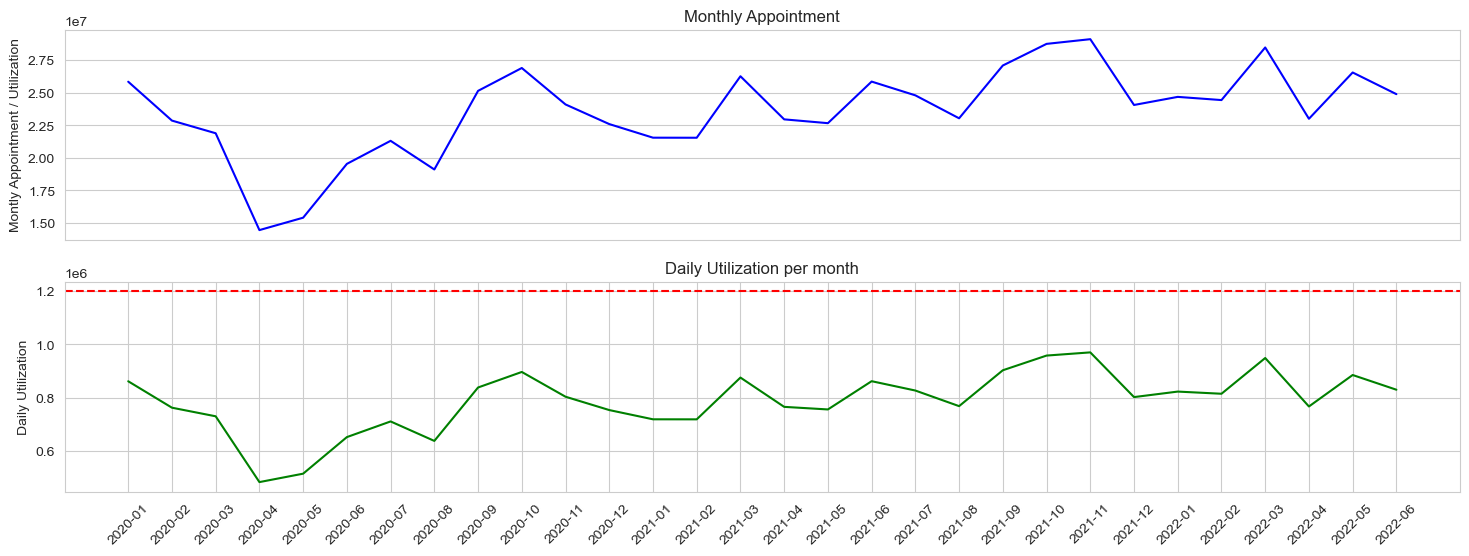

In [56]:
# Create a lineplot indicating the number of monthly visits. 
# Create a lineplot indicating the monthly capacity utilisation

fig,ax = plt.subplots(2,1, figsize=(18,6))

ax[0].set_title("Monthly Appointment")
ax[0].set_ylabel("Montly Appointment / Utilization")
ax[0].set_xticks([])

ax[1].set_title("Daily Utilization per month")
ax[1].set_ylabel("Daily Utilization")
plt.xticks(rotation = 45)

line_1 = ax[0].plot(ar_df["appointment_month"], ar_df["count_of_appointments"],'b', label = "appointment")
line_2 = ax[1].plot(ar_df["appointment_month"], ar_df["utilization"],"g", label="utilization")
plt.axhline(y=1200000, label="Max Capacity",linestyle="--", color="r")

plt.show()

# INSIGHTS
The records from the past 30 months revealed that the capacity of the utility were under deployed.

Attention should be paid in order to avoid wastage of resources and to develop incentive from the communitiy to fully take advantages of the services offered from NHS.

# BUSINESS QUESTION:
# How do the healthcare professional types differ over time?

[Text(0.5, 1.0, 'Appointment Trends with different Health Care Professional')]

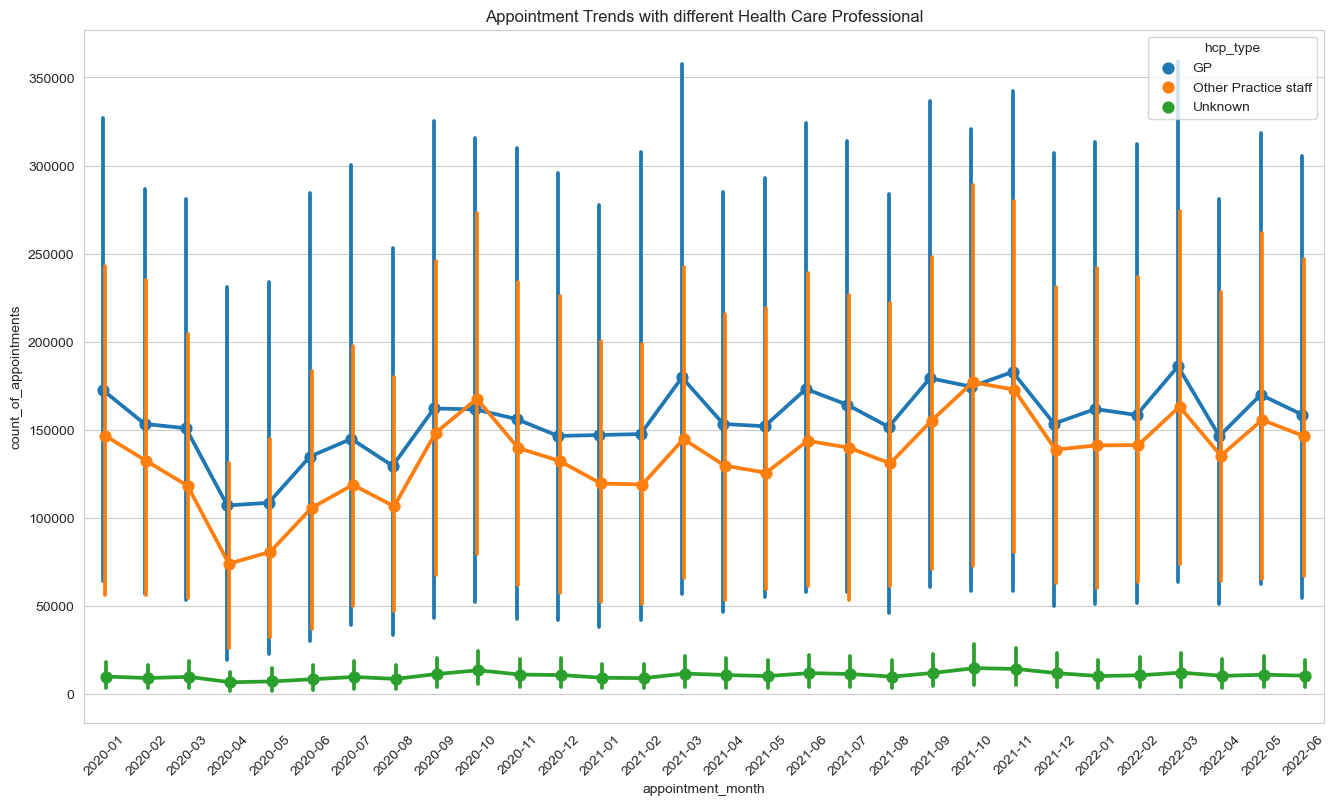

In [57]:
# How do the healthcare professional types differ over time?
# Create a lineplot in Seaborn to answer the question.
# Specify the necessary variables and parameters.
# Healthcare professional type is displayed in the data set as hcp_type.

fig,ax = plt.subplots(figsize=(16,9))

plt.xticks(rotation=45)

sns.pointplot(ar_agg, 
            x="appointment_month", 
            y="count_of_appointments", 
            hue="hcp_type",
             dodge = True
             ).set(title="Appointment Trends with different Health Care Professional")

# INSIGHTS FROM THE HCP APPOINTMENT PER MONTH
The trends between GP and Other Practice staff basically showed a positive relaionship. However, the spread of the data from GP was obviously larger than the Other Practice Staff.

One of an assumption from this plot should be based on the same data source which might not be suitable with a large number of centers of NHS where some center might provide specifically with Other Practice Staff while some centers not. Then the geographical discrepancies about the demand volumn would be more stable for the service with less geographical effect originated from demographics, income level, public utility (e.g. transports)

# Are there significant changes in whether or not visits are attended?

C:\Users\Kenneth Lo\AppData\Local\Temp\ipykernel_14552\2818919282.py:2: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.
  attendance_grouped = attendance_dummy.groupby(["appointment_month",


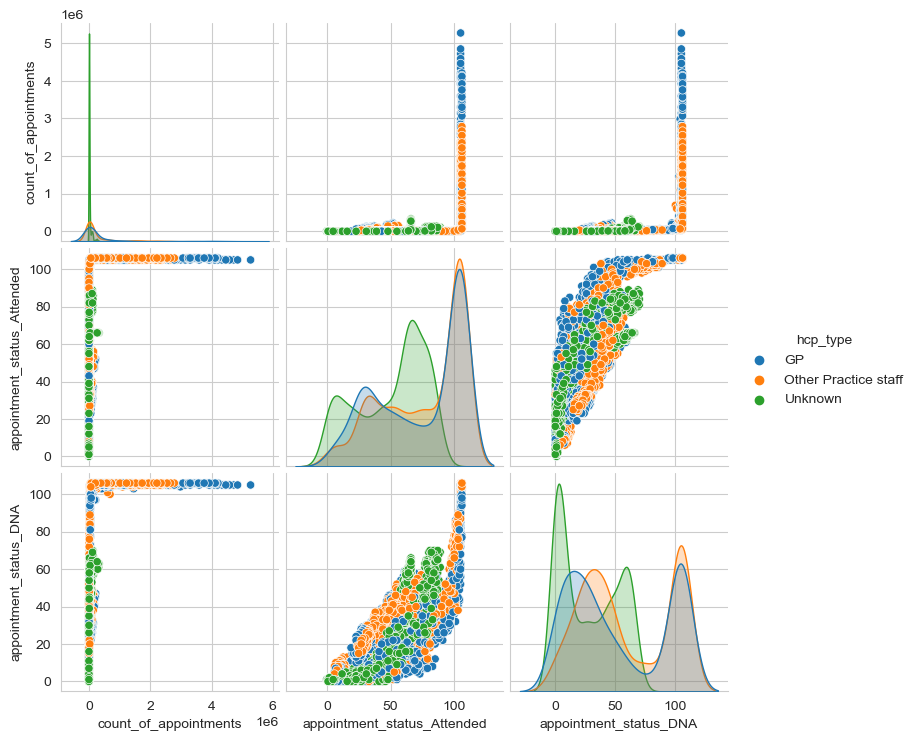

In [58]:
attendance_dummy = pd.get_dummies(ar_subset, columns =["appointment_status"])
attendance_grouped = attendance_dummy.groupby(["appointment_month",
                                               "hcp_type",
                                               "appointment_mode",
                                               "time_between_book_and_appointment"]
                                             )["count_of_appointments",
                                               "appointment_status_Attended",
                                               "appointment_status_DNA"
                                              ].sum().reset_index()

sns.pairplot(attendance_grouped, hue="hcp_type")

# INSIGHTS ABOUT ATTENDANCE STATUS
1. From the pairplot of the total attendance and do-not-attendance, the hcp type of might have different pattern to each category.
2. For appointment recorded as attended, the distribution of count (in the middle of the above pair plot), the distributions from each hcp category were some kind a bi-modal distribution, i.e. there existed two highest frequency of counts. It would be obvious that the distribution pattern for the "unknown" hcp were different to the rest of hcp's. The pattern for GP and Other Practice staff showed similar pattern of distribution

3. While for those appointment recorded as do-not-attend (in the lower right corner), the distribution between the three types of practioners were varied between each group. A general observation were that the unknown practioners skewed towards to the of the plot, which might be due to some systematic reasons instead of a probability of chance of attendance comparing to the other practices.

4. The double peaked distribution usually indicates you’ve got two different groups in the sample.


# BUSINESS QUESTION: Are there any trends in time between booking an appointment?
 

[Text(0.5, 1.0, 'Total Days Utilized for Booking Appointments')]

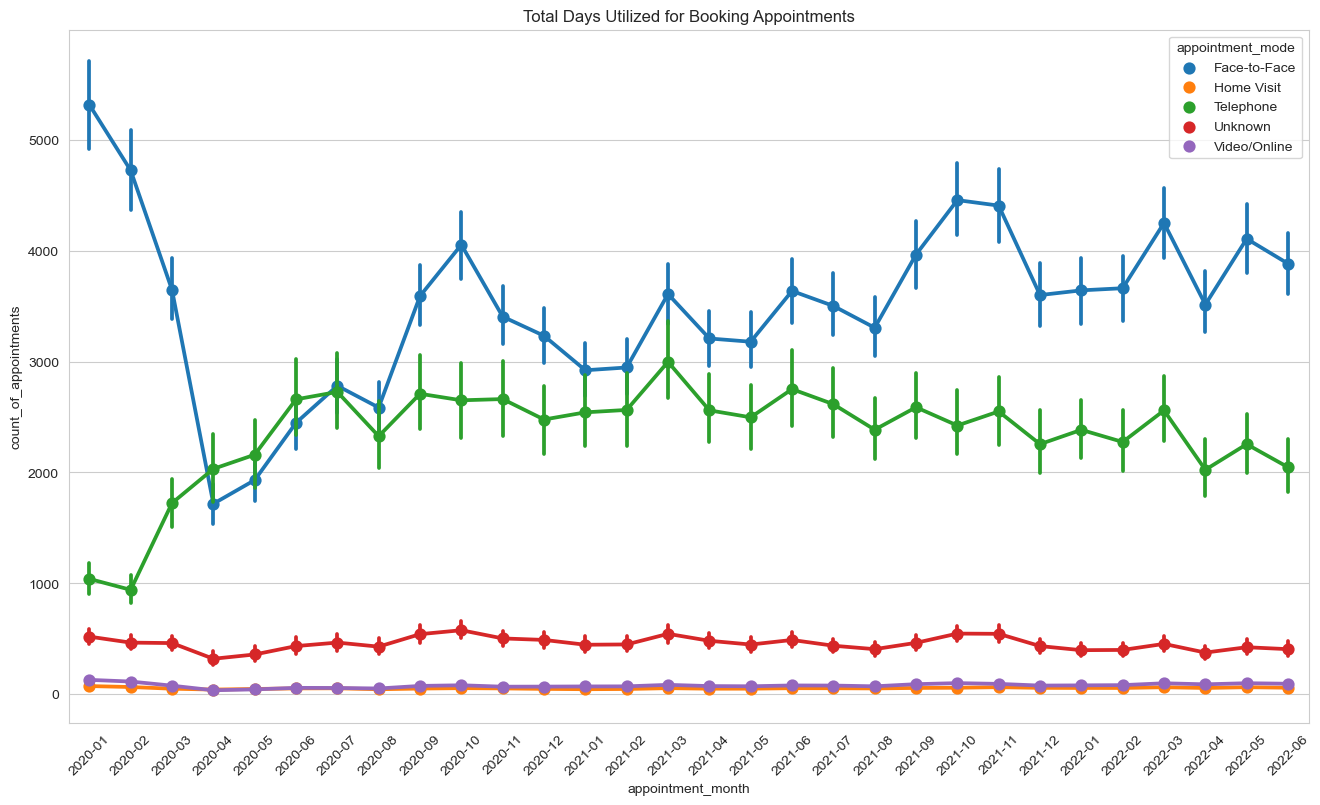

In [72]:
# Are there any trends in time between booking an appointment?

fig,ax = plt.subplots(figsize=(16,9))

plt.xticks(rotation=45)

sns.pointplot(ar_subset, 
              x="appointment_month", 
              y="count_of_appointments", 
              hue= "appointment_mode",
             ).set(title ="Total Days Utilized for Booking Appointments")

# INSIGHTS FROM THE TREND
1. There was an tremendous dropped down of number of appointment starting from Jan 2020 - Apr 2020. This might be attributed to the COVID19 restriction policy announced by the Government in order for limiting the infection of the virus. 
Sources:
https://www.instituteforgovernment.org.uk/data-visualisation/timeline-coronavirus-lockdowns

2. After the ease of the restriction, the face-to-face appointment climbed steadily and the trend was moving upward in the plot.

3. While for appointment mode with telephone, it appeared that there was a downward trend up to the end of the studied period.

4. Therefore, a plan for moving resources from telephone appointment to face-to-face might be wise decision, although the cost for face-to-face appointment might be higher than the telephones. 

5. For the rest of appointment modes, the chart did not show any significant trends accordingly.


# SUGGESTION: MORE BUDGET ESTIMATES SHOULD BE EXPLORED

# EXPLORATION OF REASONS FOR NON-ATTENDANCE
While it was shown that the face-to-face mode of appointment contributed to the highest count of appointment, it would be necessary to know further about the reason of non-attendance accordingly.

We would work with the sub-category for all-non-attended class with the mode of appointment as follow.

C:\Users\Kenneth Lo\AppData\Local\Temp\ipykernel_14552\108241920.py:9: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar=None` for the same effect.

  sns.pointplot(ar_DNA,


[Text(0.5, 1.0, 'Anlaysis about Time between booking and appointment for Non-Attendance')]

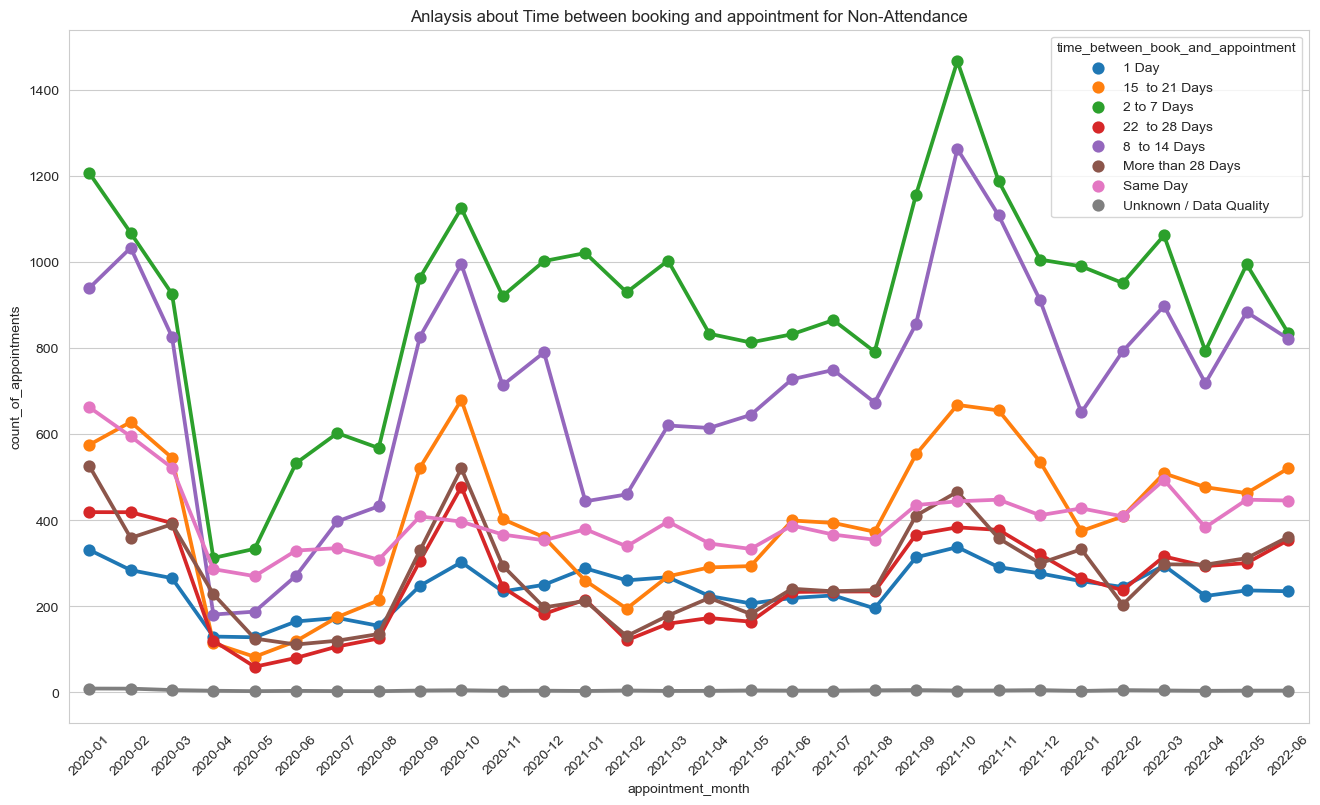

In [74]:
ar_ap_DNA = ar_subset[ar_subset["appointment_status"]=="DNA"]

ar_DNA = ar_ap_DNA[ar_ap_DNA["appointment_mode"] == "Face-to-Face"]

fig,ax = plt.subplots(figsize=(16,9))

plt.xticks(rotation=45)

sns.pointplot(ar_DNA,
              x="appointment_month", 
              y="count_of_appointments",                                      
              hue="time_between_book_and_appointment",
              ci=None
             ).set(title="Anlaysis about Time between booking and appointment for Non-Attendance")

# As can be seen from the plot, the time between booking and appointment for 2-7 days was highest against other categories, and more than 28 days being the second highest.
# The reason would be complex and required further analysis with further data support, like questionnaire survey conducted during the booking conversation in order to know further if the patient's prefered schedule could match with the GP appointment schedule.


# How do the various service settings compare?

In [ ]:
#View the national_category.csv DataFrame you created in an earlier assignment activity.
print(nc_ss.shape)
nc_ss.head()

In [62]:
#Create a new DataFrame and group the month of appointment and number of appointments.
nc_no_gp = nc_ss[nc_ss["service_setting"]!="General Practice"]

# View dataframe
nc_no_gp.head()


,appointment_month,service_setting,count_of_appointments
0,2021-08,Extended Access Provision,160927
2,2021-08,Other,449101
3,2021-08,Primary Care Network,432448
4,2021-08,Unmapped,1233843
5,2021-09,Extended Access Provision,187906


<Axes: xlabel='service_setting', ylabel='count_of_appointments'>

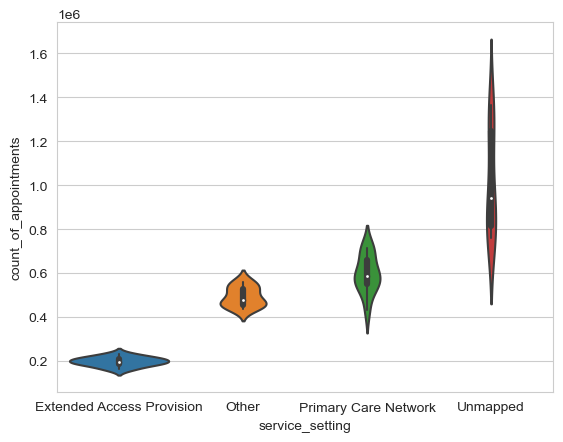

In [63]:
# Create a second visualisation in Seaborn where you concentrate on all the service settings excluding GP visits
sns.violinplot(nc_no_gp, x="service_setting", y="count_of_appointments")

# INSIGHT FROM THE SERVICE SETTING WITHOUT GP
# 1. The Extended Access Provision occured with the least spread and symmetrically distributed with the counts of appointment meaning that this group presented an accurate mean of estimate.

# 2. The unmapped group was showing in the plot with a very large spread of data which might attribut to some purely random occations.

# 3. For the group primary care network, the data showed a wider spread but still tended to be symmetrically distributed. This might be of less error during input.

# 4. The "Other" group appeared to be skewed with two mode within the data occurance, which might have some more than one major variable inside.
